In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('learnhtmlpro-clean.csv', index_col='review_id')

In [3]:
df.head(5)

,username,star_rating,date,review_content,thumbsup,device,app_version,sentiment_label,sentiment_score
review_id,,,,,,,,,
37ced158-8ab4-47d7-837f-a0aee213fd8c,Jereld Camphor,5,2020-08-23,It is an excellent app. It provides a practica...,79.0,Phone,1.3.4,positive,0.998888
1c03e4e9-c29a-4bdb-aa0e-1360b63842c7,Harrison H,5,2020-10-30,So far I like the app a lot. It may not look a...,130.0,Phone,1.3.7,positive,0.998929
27722653-2923-409c-844a-73cfad4e6271,Julio Lh,4,2024-12-06,A great resource for learning HTML or brushing...,NaN,Phone,1.4.4,positive,0.998741
f1fc09c7-b3c1-46fa-833b-ba07d2f67eb6,Cecile Perret,5,2020-10-19,I really like this app and its partner apps (c...,40.0,Phone,1.3.7,positive,0.998935
c06a6a0b-0a83-427c-bf67-6b981a4b8589,Cathy Furman,4,2023-02-19,"App works well, some bugs here and there with ...",17.0,Phone,1.4.4,positive,0.998915


In [8]:
# change datatype to string for each of the columns
df['app_version'] = df['app_version'].astype('str')
df['star_rating'] = df['star_rating'].astype('str')

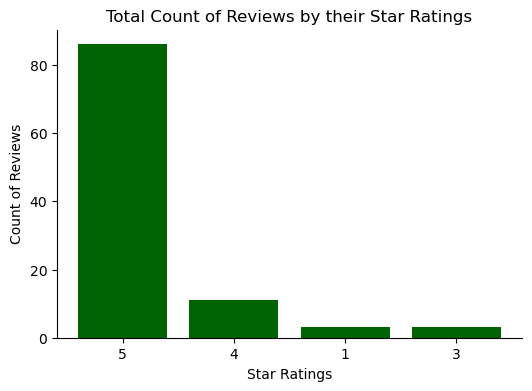

In [14]:
# set figsize
plt.figure(figsize=(6,4))

# plot bar chart
y = df['star_rating'].value_counts()
x = y.index.to_list()
plt.bar(x,y, color='#006400')

# get current axis
ax = plt.gca()

# remove the top and right border lines 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

# visual formatting
plt.xlabel('Star Ratings')
plt.ylabel('Count of Reviews')
plt.title('Total Count of Reviews by their Star Ratings')

# show visual
plt.show()

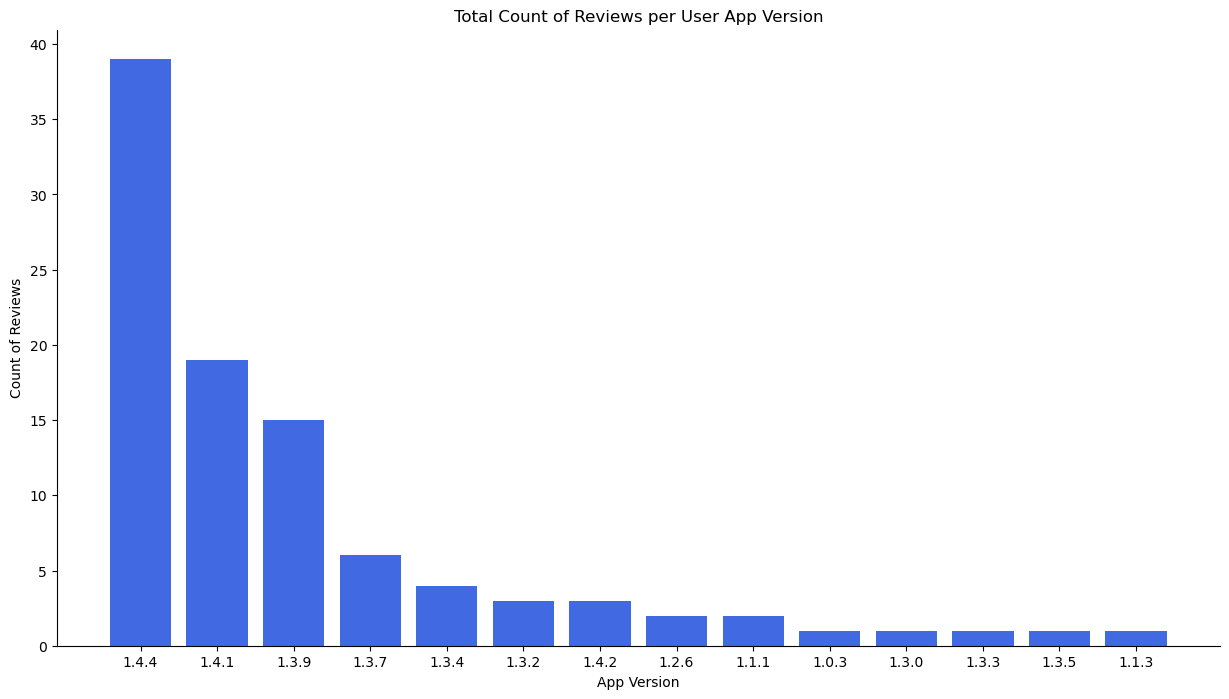

In [15]:
# set figsize
plt.figure(figsize=(15,8))

# bar chart of the app versions
y = df[df['app_version'] != 'nan']['app_version'].value_counts()
x = y.index.to_list()
plt.bar(x,y, color='#4169E1')

# get current axis
ax = plt.gca()

# remove the top and right border lines 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

# visual formatting
plt.xlabel('App Version')
plt.ylabel('Count of Reviews')
plt.title('Total Count of Reviews per User App Version')

# show visual
plt.show()

In [25]:
# set to `datetime` format
df['date'] = pd.to_datetime(df['date'])
# extract `year` column from the `date` column
df['year'] = df['date'].dt.year

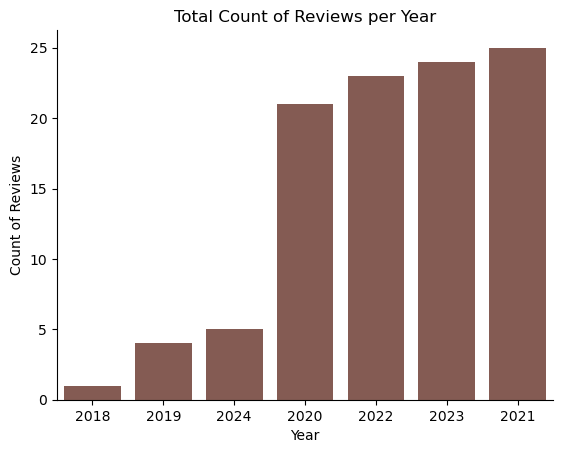

In [46]:
# set the order index for the bar chart
ordering = df['year'].value_counts(ascending=True).index
# plot the review counts per year
sb.countplot(data=df, x='year', color = sb.color_palette()[5], order=ordering)

# get current axis
ax = plt.gca()

# remove the top and right border lines 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

# visual formatting
plt.xlabel('Year')
plt.ylabel('Count of Reviews')
plt.title('Total Count of Reviews per Year')

# show visuals
plt.show()

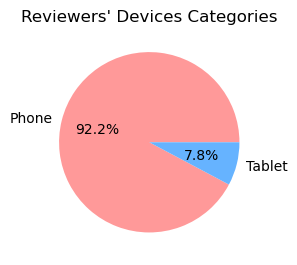

In [44]:
# a pie chart of the device types
colors = ['#FF9999', '#66B3FF']
df['device'].value_counts().plot(kind='pie', ylabel='', autopct='%1.1f%%', colors = colors )

# visual formatting
plt.title("Reviewers' Devices Categories")

# show visual
plt.show()

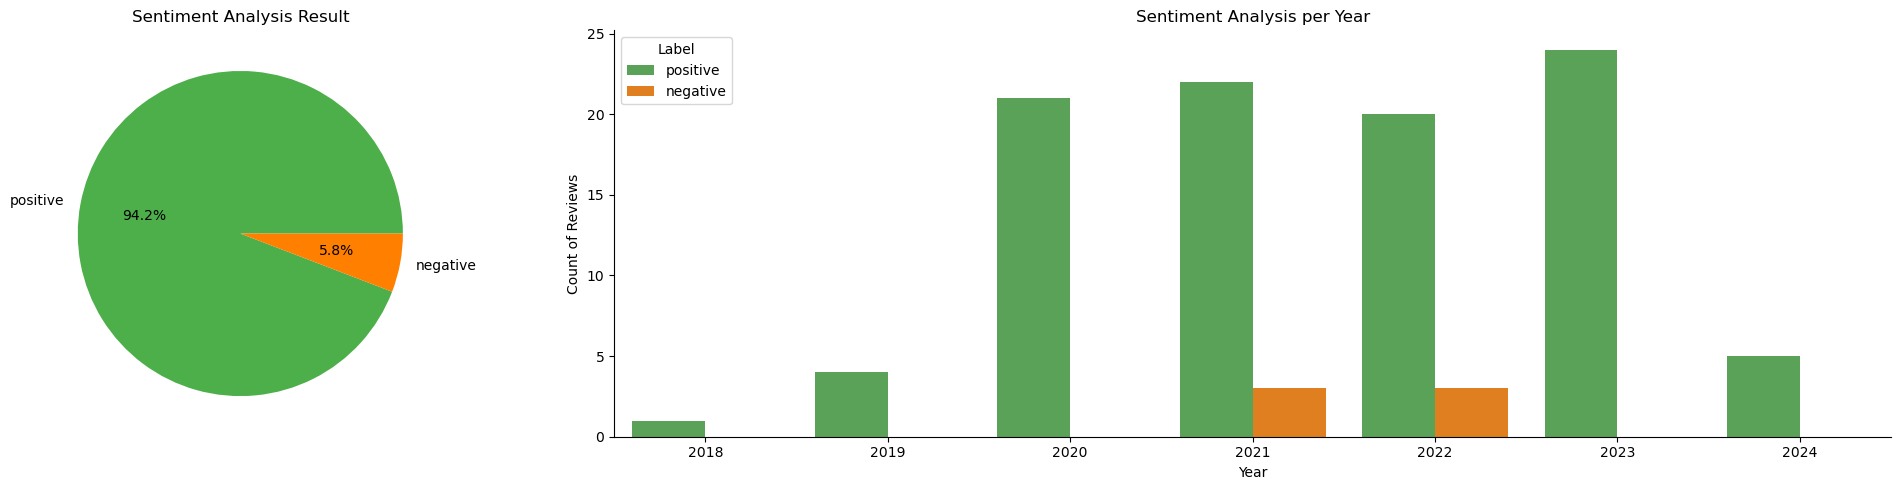

In [62]:
# set figsize and grid specifications
plt.figure(figsize=[20,5])
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

# a pie chart of sentiment results in the first sub-plot
plt.subplot(gs[0])
colours = ['#4daf4a', '#ff7f00']
df['sentiment_label'].value_counts().plot(kind='pie', ylabel='', autopct='%1.1f%%', colors=colours)
# visual formatting
plt.title("Sentiment Analysis Result")


# plot the distribution of the count of postive and negative reviews per year
plt.subplot(gs[1])
# set matching color palette with the pie chart on the left
pallette = sb.color_palette(colours)
sb.countplot(data=df, x='year',hue= 'sentiment_label',palette = pallette)
# visual formatting
plt.xlabel("Year")
plt.ylabel("Count of Reviews")
plt.title('Sentiment Analysis per Year')
plt.legend(title="Label", loc=2)
# remove the top and right border lines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);


# Adjust subplots to fit into the figure area
plt.tight_layout()
# show visual
plt.show()